In [71]:
from IPython.html.widgets import interact, interactive, fixed
from IPython.html import widgets
import matplotlib.pyplot as plt
import numpy as np
from collections import OrderedDict
%matplotlib inline

In [72]:
import Graph_dictionary
import distance_from_lat_long
im = plt.imread('map.jpg')
pixel_to_meter = 500./(497-300)
start_finish_pixel = (1472,1340)

(PT,X,Y) = distance_from_lat_long.polar_to_cartesian()

In [104]:
def trip_plotter(X,Y,team_trip,step,color = 'r'):
    start_index = team_trip[step].num-100
    end_index = team_trip[step].nxt-100
    plt.plot([X[start_index],X[end_index]],[Y[start_index],Y[end_index]],color,linewidth= 3)
    
def int_plot(step = 0,team = ''):
    fig = plt.figure(1,figsize =(35,35))
    ax = fig.add_subplot(111,aspect = 'equal')
    extent_x = (np.array([0,np.shape(im)[1]])-1472)*pixel_to_meter
    extent_y = (np.array([0,np.shape(im)[0]])-1359)*pixel_to_meter
    implot = plt.imshow(im,extent = list(np.append(extent_x,extent_y)))
    (PT,X,Y,Z) = distance_from_lat_long.pixel_to_cartesian()

    #if plot_check_points:
    plt.scatter(x = X,y = Y,c = 'r',s = 175)
    team_graph = Graph_dictionary.team_grapher()      
    if team != '-1':
        team_trip = team_graph[team]
        if len(team_trip) > step:
            trip_plotter(X,Y,team_trip,step-1)
            if step > 1:
                trip_plotter(X,Y,team_trip,step-2,color = 'b')
        else:
            for i in range(len(team_trip)-1):
                trip_plotter(X,Y,team_trip,i)
    else:
        for team_trip in team_graph.values():
            #team_trip = team_graph[team]
            if len(team_trip) > step:
                #for i in range(len(team_trip)-1):
                trip_plotter(X,Y,team_trip,step-1)
                if step > 1:
                    trip_plotter(X,Y,team_trip,step-2,color = 'b')
        
    #return(fig)
        #for i in range(len(X)):
            #pt = plt.plot([-start_finish_pixel[0]*pixel_to_meter,pixel_to_meter*(np.shape(im)[1]-start_finish_pixel[0])],
                     #[Y[i],Y[i]],'r')
            #plt.scatter(x = X,y = Y,c = 'r',s = 10)
        #plt.ylim(0,900)
        #plt.xlim(-10,30)

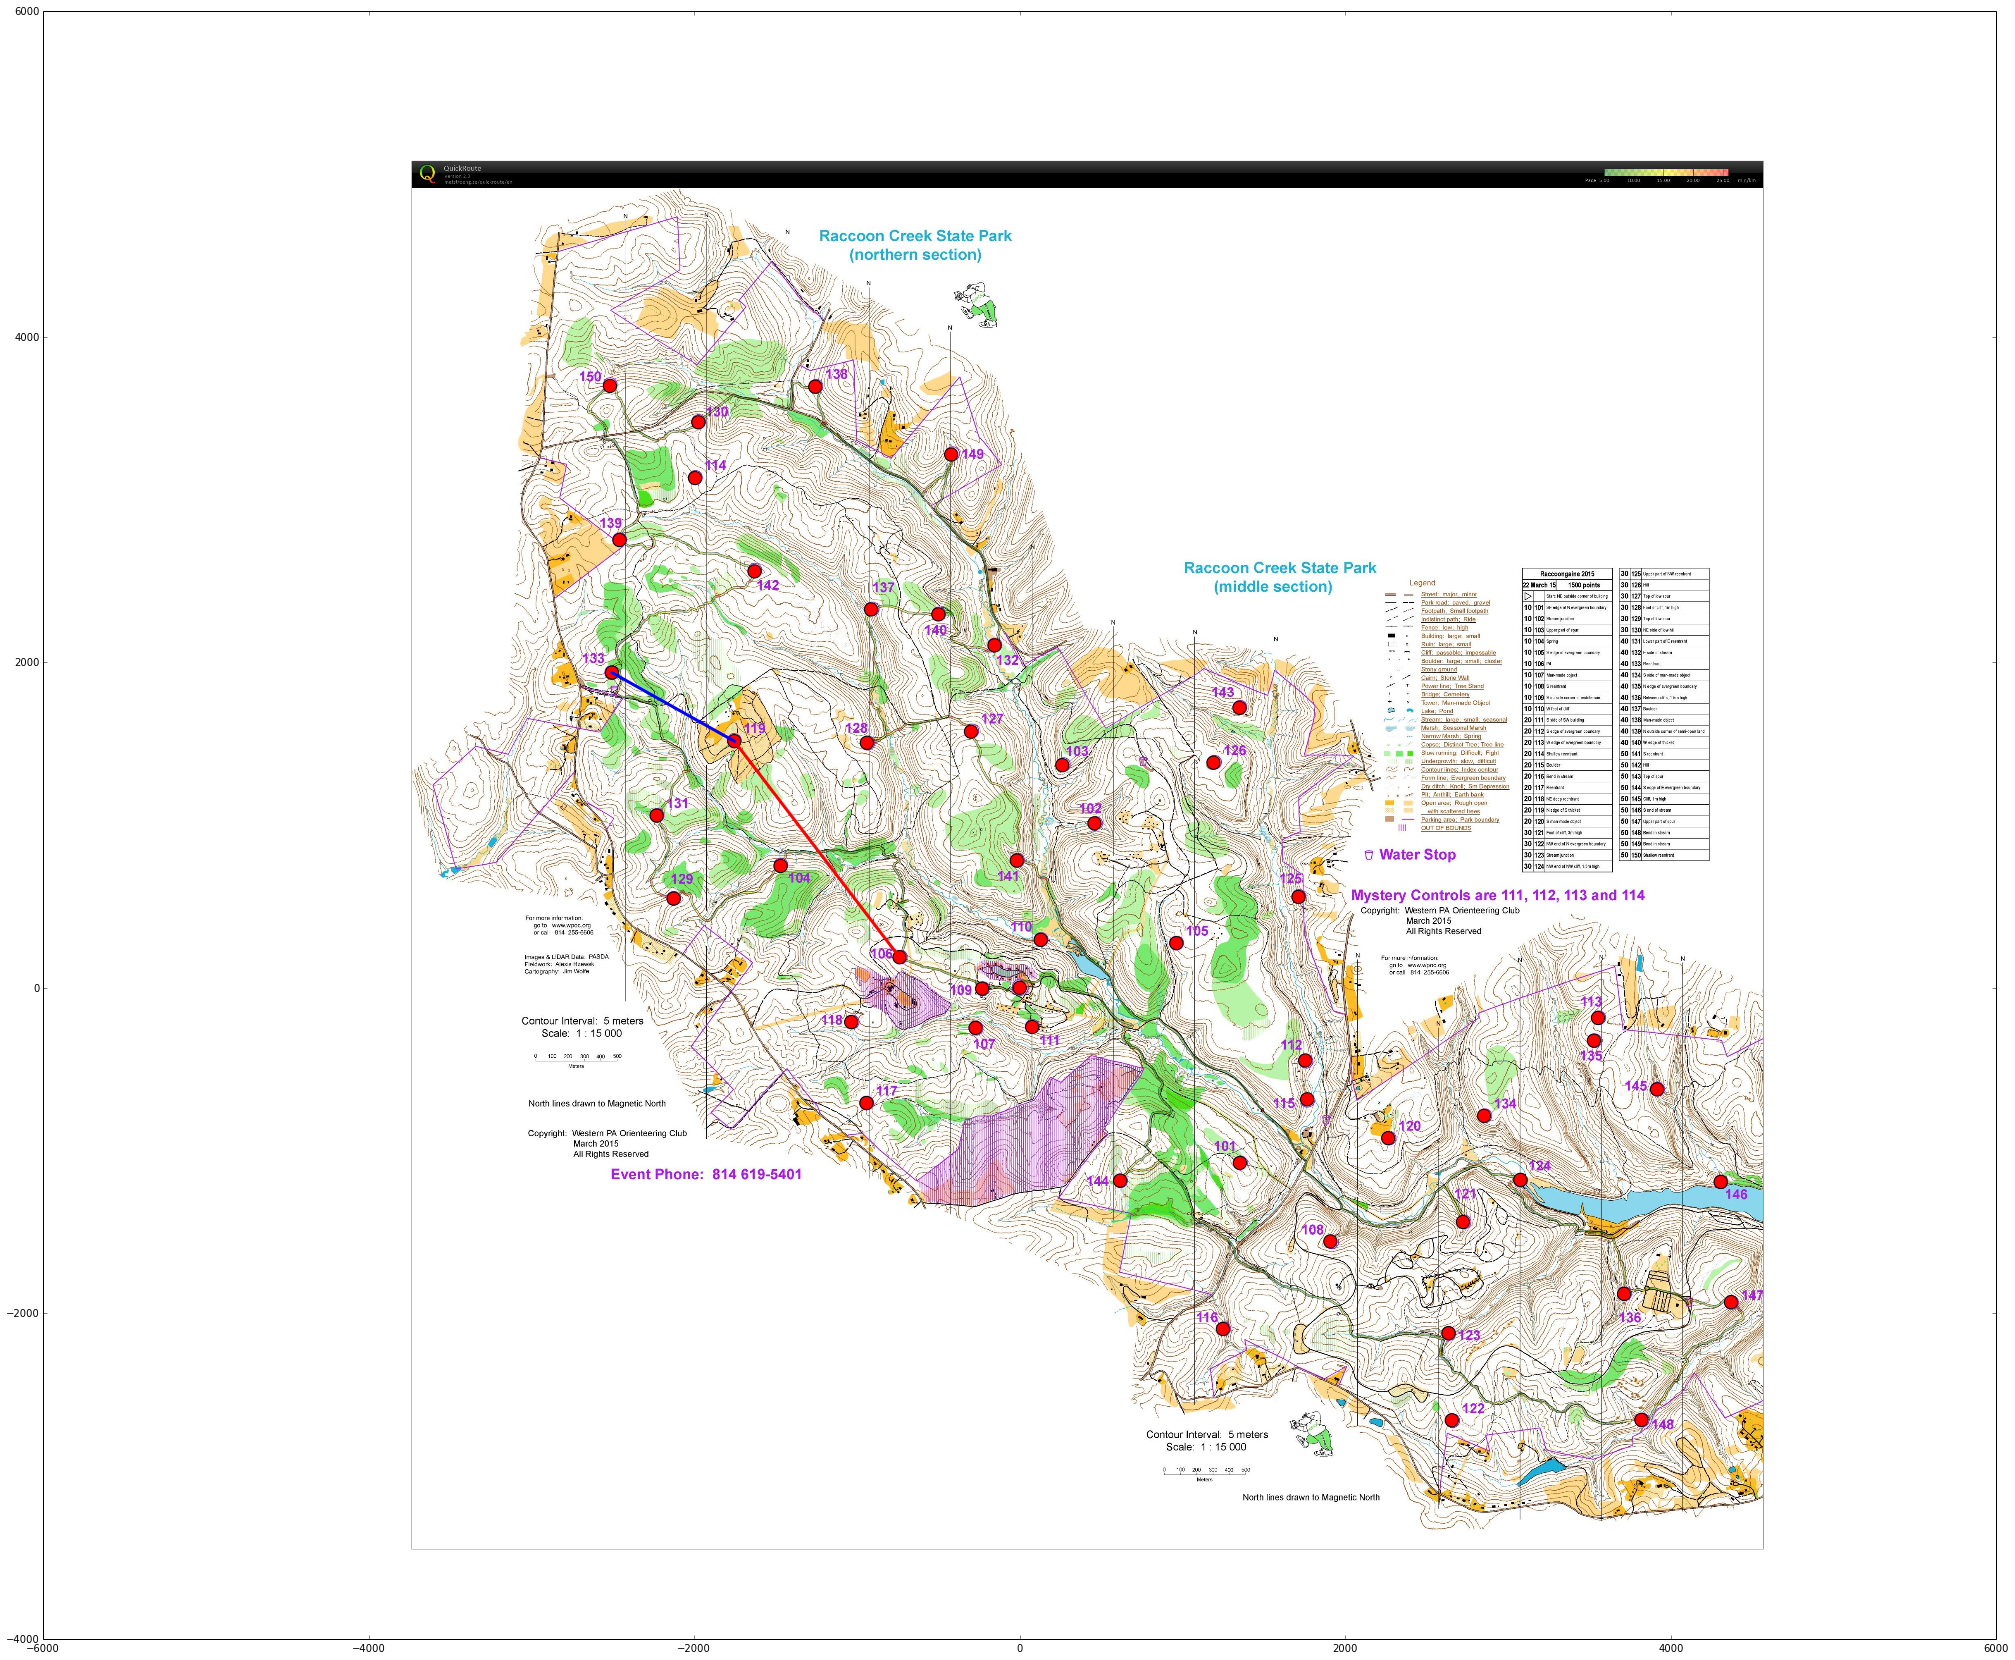

In [105]:
#fig = plt.figure(1, figsize = (15,20))
f = open('Team_place_time_score.csv')
lines = f.readlines()
f.close()
team_dic = {'all':'-1'}
for line in lines:
    tm = line.strip().split(',')[1].replace('"','').split(' ')
    team_dic[' '.join(tm[1:])] =tm[0]
    
interact(int_plot, step = (1,39,1),team = team_dic);

In [29]:
interact(f, x='Hi there!');

Hi there!


In [30]:
@interact(x=True, y=1.0)
def g(x, y):
    print(x, y)

(True, 1.0)


In [31]:
def h(p, q):
    print(p, q)

In [32]:
interact(h, p=5, q=fixed(20));

(5, 20)


In [33]:
@interact(x=(0.0,20.0,0.5))
def h(x=5.5):
    print(x)

5.5


In [34]:
interact(f, x=('apples','oranges'));

apples


In [35]:
interact(f, x={'one': 10, 'two': 20});

20


In [36]:
def f(a, b):
    return a+b

In [37]:
w = interactive(f, a=10, b=20)

In [38]:
type(w)

IPython.html.widgets.widget_box.Box

In [39]:
w.children

(<IPython.html.widgets.widget_int.IntSlider at 0x7f9fbf5a58d0>,
 <IPython.html.widgets.widget_int.IntSlider at 0x7f9fbf5b6210>)

In [40]:
from IPython.display import display
display(w)

In [24]:
w.result

34